In [2]:
# Importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tracks Dataset Analysis

### Dataset Cleaning and formating - 

In [3]:
# Importing dataset from csv to a dataframe
tracks = pd.read_csv('tracks.csv')

In [4]:
# Getting dataset info
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   year              586672 non-null  int64  
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
# Checking null values in each column
tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
year                 0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [6]:
#Droping null values
tracks.dropna(inplace = True)

# Checking null values after droping all null rows
tracks.isnull().sum() 

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
year                0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [7]:
# Creating a duration column to show duration in seconds using apply method and lambda function
tracks['duration'] = tracks['duration_ms'].apply(lambda x : round(x/1000))

# Pulling the new duration column
tracks['duration'].head(10)

0    127
1     98
2    182
3    177
4    163
5    179
6    134
7    161
8    310
9    181
Name: duration, dtype: int64

In [8]:
# Droping unnecessary columns 
tracks.drop(['id','id_artists','key','mode', 'time_signature','duration_ms'], axis = 1, inplace =True)

#Checking the final dataset
tracks.head()

,name,popularity,explicit,artists,year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,Carve,6,0,['Uli'],1922,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851,127
1,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],1922,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009,98
2,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],1922,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418,182
3,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],1922,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980,177
4,Lady of the Evening,0,0,['Dick Haymes'],1922,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220,163


### Dataset Analysis -

### Finding out Top 10 Most Popular songs

In [9]:
# Using sort values and head method using populrity as the base to extract top 10 popular songs
tracks[['name','artists', 'popularity']].sort_values('popularity', ascending = False).head(10).reset_index(drop = True)

,name,artists,popularity
0,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",100
1,drivers license,['Olivia Rodrigo'],99
2,Astronaut In The Ocean,['Masked Wolf'],98
3,telepatía,['Kali Uchis'],97
4,Save Your Tears,['The Weeknd'],97
5,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",96
6,Blinding Lights,['The Weeknd'],96
7,The Business,['Tiësto'],95
8,Fiel,"['Los Legendarios', 'Wisin', 'Jhay Cortez']",94
9,Bandido,"['Myke Towers', 'Juhn']",94


### Top 20 Least popular songs with a popularity above 90

In [10]:
# Using query fucntion to filter tracks according to popularity and sorting values accordingly
tracks[['name','artists', 'popularity']].query('popularity>90').sort_values('popularity', ascending = True).head(20).reset_index(drop = True)

,name,artists,popularity
0,34+35,['Ariana Grande'],91
1,Your Love (9PM),"['ATB', 'Topic', 'A7S']",91
2,911,['Sech'],91
3,What You Know Bout Love,['Pop Smoke'],91
4,Head & Heart (feat. MNEK),"['Joel Corry', 'MNEK']",91
5,ROCKSTAR (feat. Roddy Ricch),"['DaBaby', 'Roddy Ricch']",91
6,What’s Next,['Drake'],91
7,BICHOTA,['KAROL G'],91
8,you broke me first,['Tate McRae'],91
9,Dynamite,['BTS'],91


### Finding Top 10 popular artist batch

In [11]:
# Using pivot table method to calculate mean popularity of each artist 
artists_plty = tracks[['artists','popularity']].pivot_table(index = 'artists',values = 'popularity', aggfunc= 'mean')


# Sorting values and indexing to find out top 10 popular artists
artists_plty.sort_values('popularity', ascending = False).reset_index()[:10]

,artists,popularity
0,"['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...",94.0
1,"['Los Legendarios', 'Wisin', 'Jhay Cortez']",94.0
2,"['Bad Bunny', 'ROSALÍA']",93.0
3,"['Travis Scott', 'HVME']",92.0
4,"['Rochy RD', 'Myke Towers', 'Nicki Nicole']",92.0
5,"['MEDUZA', 'Dermot Kennedy']",92.0
6,"['Nathan Evans', '220 KID', 'Billen Ted']",92.0
7,"['Bad Bunny', 'Jhay Cortez']",91.0
8,"['Saweetie', 'Doja Cat']",90.0
9,"['Maroon 5', 'Megan Thee Stallion']",90.0


### Displaying Descriptive Statistics 

In [12]:
# Using Describe and Transpose function to display descriptive statistics for the dataset
tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586601.0,27.573212,18.369417,0.0,13.0000,27.000000,41.00000,100.000
explicit,586601.0,0.044091,0.205298,0.0,0.0000,0.000000,0.00000,1.000
year,586601.0,1988.571729,22.826243,1900.0,1974.0000,1992.000000,2007.00000,2021.000
danceability,586601.0,0.563612,0.166101,0.0,0.4530,0.577000,0.68600,0.991
energy,586601.0,0.542071,0.251910,0.0,0.3430,0.549000,0.74800,1.000
loudness,586601.0,-10.205789,5.089422,-60.0,-12.8910,-9.242000,-6.48100,5.376
speechiness,586601.0,0.104870,0.179902,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586601.0,0.449803,0.348812,0.0,0.0969,0.422000,0.78400,0.996
instrumentalness,586601.0,0.113425,0.266843,0.0,0.0000,0.000024,0.00955,1.000
liveness,586601.0,0.213933,0.184328,0.0,0.0983,0.139000,0.27800,1.000


### Creating a correlational dataset

In [13]:
# Creating a correlational dataset using corr function through pearson correlation method
corr_tracks = tracks.drop(['year','name','artists'], axis = 1).corr('pearson')
corr_tracks

,popularity,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
popularity,1.000000,0.211749,0.186878,0.302178,0.327001,-0.047415,-0.370723,-0.236403,-0.048735,0.004558,0.071223,0.027640
explicit,0.211749,1.000000,0.150216,0.123060,0.134598,0.102251,-0.149001,-0.067510,-0.013113,-0.016551,0.005723,-0.016748
danceability,0.186878,0.150216,1.000000,0.241464,0.251394,0.199291,-0.242838,-0.225831,-0.106175,0.528136,-0.040896,-0.120408
energy,0.302178,0.123060,0.241464,1.000000,0.764744,-0.053560,-0.715366,-0.195727,0.124636,0.372224,0.230006,0.024785
loudness,0.327001,0.134598,0.251394,0.764744,1.000000,-0.167140,-0.519423,-0.329255,0.029509,0.275416,0.189252,0.000322
speechiness,-0.047415,0.102251,0.199291,-0.053560,-0.167140,1.000000,0.069121,-0.102425,0.207062,0.046481,-0.086950,-0.125782
acousticness,-0.370723,-0.149001,-0.242838,-0.715366,-0.519423,0.069121,1.000000,0.204312,-0.004742,-0.180878,-0.195117,-0.064395
instrumentalness,-0.236403,-0.067510,-0.225831,-0.195727,-0.329255,-0.102425,0.204312,1.000000,-0.038836,-0.175195,-0.055380,0.069321
liveness,-0.048735,-0.013113,-0.106175,0.124636,0.029509,0.207062,-0.004742,-0.038836,1.000000,-0.000052,-0.014923,0.002140
valence,0.004558,-0.016551,0.528136,0.372224,0.275416,0.046481,-0.180878,-0.175195,-0.000052,1.000000,0.135198,-0.163231


### Heatmap of different audio features

Text(0.5, 1.0, 'Correlation Heatmap for audio features')

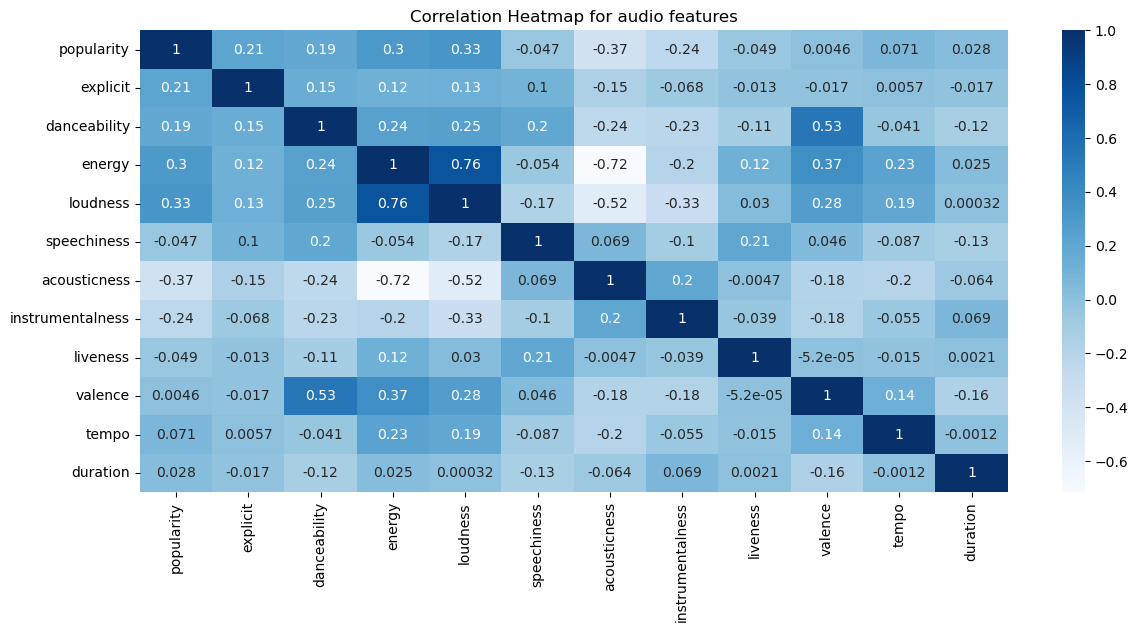

In [14]:
# Assigning figure size
plt.figure(figsize = (14,6))

# Creating a heatmap using seaborn using correlational database
sns.heatmap(corr_tracks, annot = True,cmap =  'Blues').set_title('Correlation Heatmap for audio features')

#### Conlusion - 

The heatmap reveals several key insights: energy and loudness have a strong positive correlation, indicating louder songs tend to be more energetic. Acousticness has a strong negative correlation with energy and loudness, suggesting that more acoustic songs are generally less energetic and quieter. Popularity shows moderate positive correlations with energy and loudness.

### Regression Analysis -

In [15]:
# Sampling out data for proper regression analysis - 
tracks_sam = tracks.sample(int(len(tracks)*0.005))
len(tracks_sam)

2933

#### Acousticness v/s popularity

Text(0, 0.5, 'Popularity')

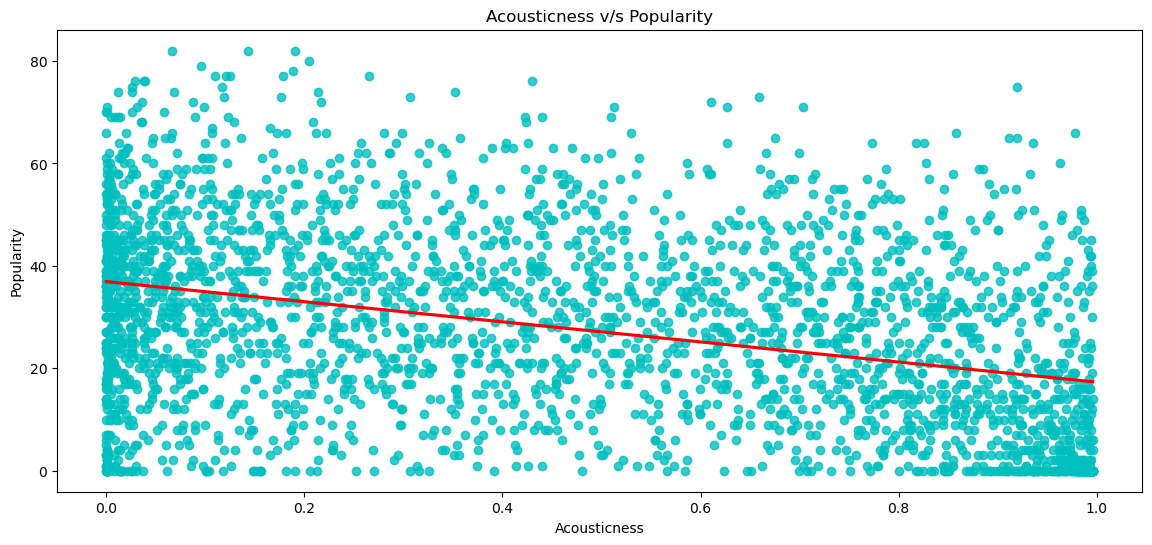

In [16]:
# Creating regression plot using matlplotlib and seaborn - 

# Assigning figure size
plt.figure(figsize = (14,6))

# Creating a regression using seaborn
sns.regplot(tracks_sam, x = 'acousticness', y = 'popularity', ci = None, color = 'c', line_kws = {'color':'red'})

# Labeling the Plot
plt.title('Acousticness v/s Popularity')
plt.xlabel('Acousticness')
plt.ylabel('Popularity')

#### Conlusion - 

The regression plot indicates a slight negative correlation between acousticness and popularity. As acousticness increases, song popularity tends to decrease marginally, suggesting that more acoustic songs are generally less popular.

#### Energy v/s Danceability

Text(0, 0.5, 'Danceability')

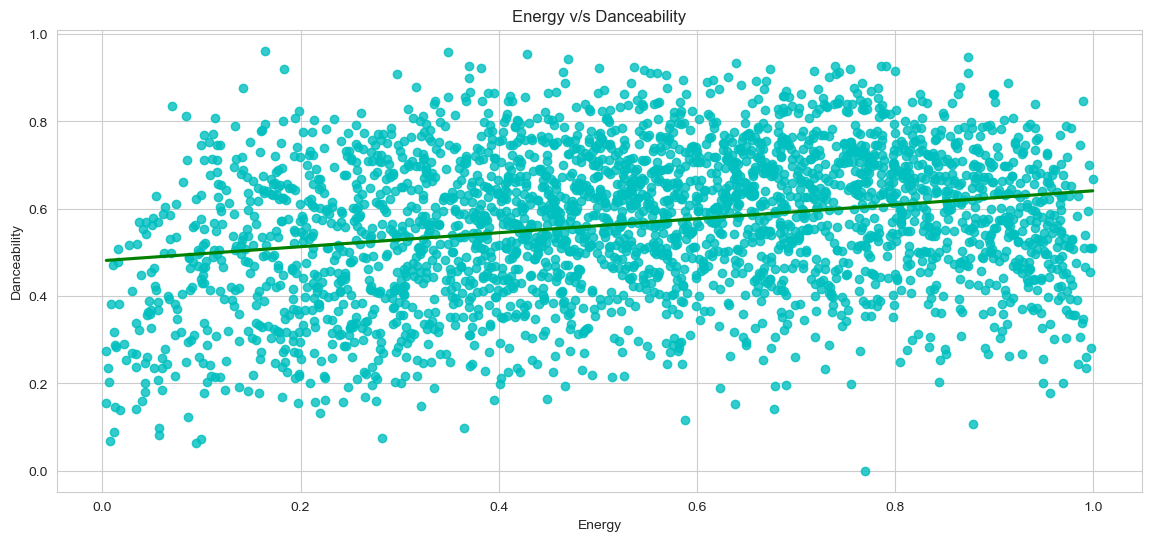

In [30]:
# Creating regression plot using matlplotlib and seaborn - 

# Assigning figure size
plt.figure(figsize = (14,6))

# Creating a regression using seaborn
sns.regplot(tracks_sam, x = 'energy', y = 'danceability', ci = None, color = 'c', line_kws = {'color':'g'}).set_title('Energy v/s Loudness')

# Labeling the Plot
plt.title('Energy v/s Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')

#### Conlusion - 

The regression plot illustrates a clear positive correlation between energy and danceability.Therefore higher energy levels in songs correspond to increased danceability, suggesting that more energetic songs are typically more danceable. The data points follow this upward trend closely, suggesting a strong relationship between these two attributes.

### Trend Analysis - 

#### Distribution of Songs Over the Years

C:\Users\SUBROTO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x600 with 0 Axes>

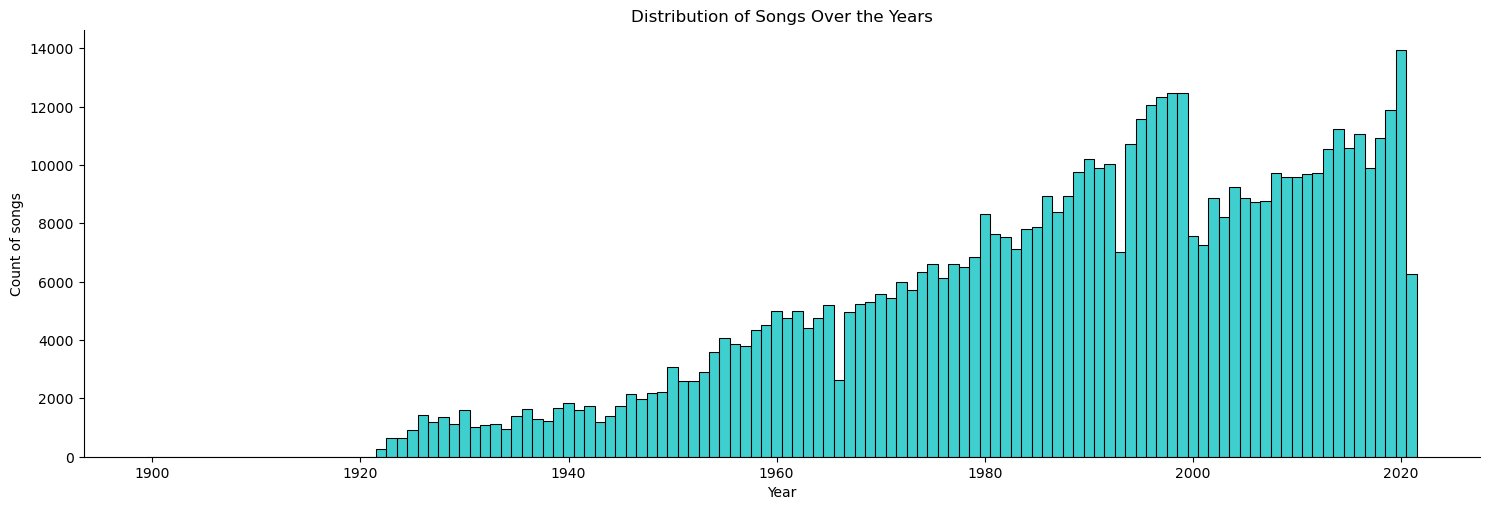

In [18]:
# Creating Hist plot using seaborn and pyplot - 

# Assigning figure size
plt.figure(figsize = (14,6))

# Creating a Histplot using displot in seaborn
sns.displot(tracks['year'], kind = 'hist',color = 'c', edgecolor = 'black', height = 5, aspect = 3, discrete = True).set(title = 'Distribution of Songs Over the Years', xlabel = 'Year', ylabel = 'Count of songs')

plt.show()

#### Conlusion - 

The histogram illustrates  a gradual increase in song releases, peaking around the late 2000s. Despite some fluctuations, there is a notable upward trend, indicating a significant rise in the number of songs produced in recent decades.

#### Yearly Trend of Song Duration

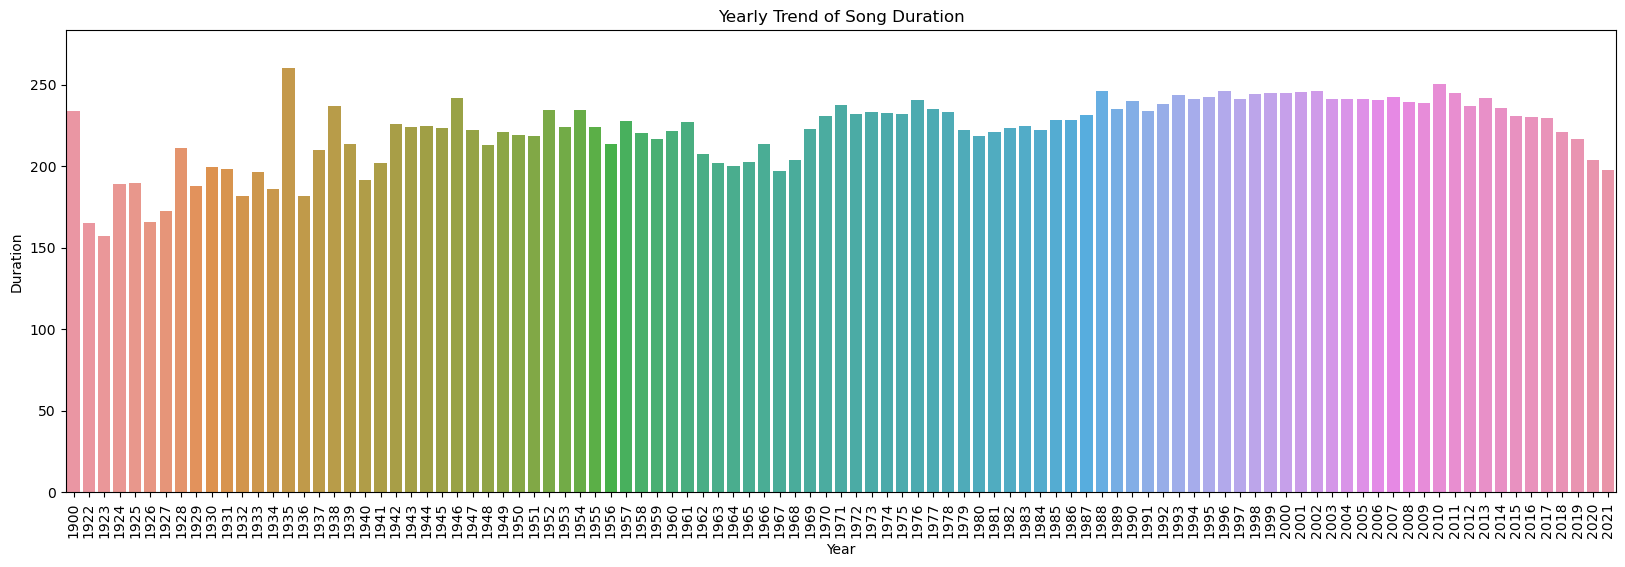

In [19]:
# Creating Bar plot using seaborn and pyplot - 

# Assigning figure size
plt.figure(figsize = (20,6))

# Creating a Bar plot using seaborn
sns.barplot(tracks,x= 'year', y = 'duration', errwidth = False).set(title = 'Yearly Trend of Song Duration', xlabel = 'Year', ylabel = 'Duration')

#Modifying x ticks using pyplot
plt.xticks(rotation = 90)
plt.show()

#### Conlusion - 

The bar plot shows the yearly trend of song durations from 1921 to 2021. The data reveals a fluctuating pattern over the years with no consistent increase or decrease. However, from the mid-1960s onwards, there is a more stable trend in song duration. In recent decades, the average song duration appears to be declining, indicating a trend toward shorter songs over time.

#### Yearly Trend of Song Duration (Line Chart)

C:\Users\SUBROTO\AppData\Local\Temp\ipykernel_9320\2920406617.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(tracks,x= 'year', y = 'duration', ci = False, color = 'c').set(title = 'Trend of song duration per year', xlabel = 'Year', ylabel = 'Duration')


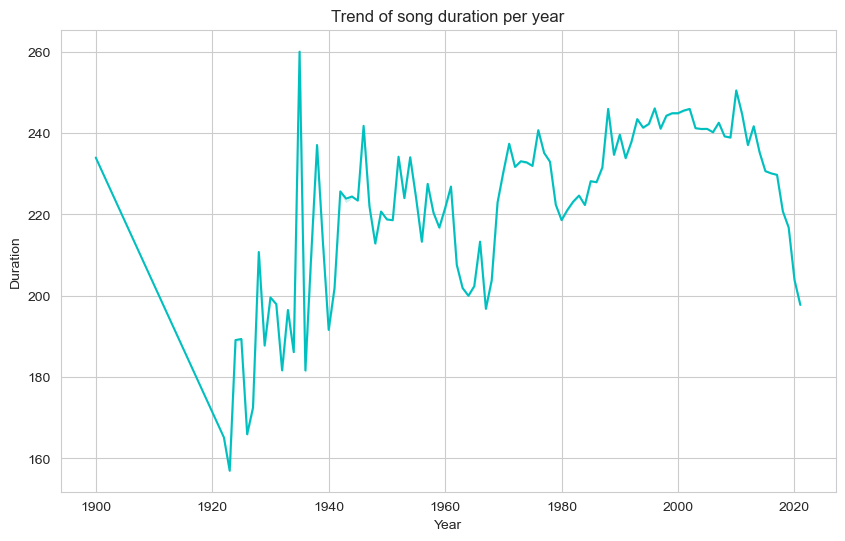

In [20]:
# Assigning figure size
plt.figure(figsize = (10,6))

# Setting Seaborn style 
sns.set_style('whitegrid')

# Creating a regression using seaborn
sns.lineplot(tracks,x= 'year', y = 'duration', ci = False, color = 'c').set(title = 'Trend of song duration per year', xlabel = 'Year', ylabel = 'Duration')

plt.show()

#### Conlusion - 

The line plot shows fluctuations throughout the mid-20th century. In recent decades, the average song duration appears to have decreased, indicating a trend toward shorter songs over time due to mass decline in attention span of people.

## Genre Dataset Analysis

### Dataset Cleaning and formating - 

In [21]:
# Importing dataset from csv to a dataframe
genre = pd.read_csv('genre.csv')

In [22]:
# Getting dataset info
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   genre           232725 non-null  object
 1   artist_name     232725 non-null  object
 2   track_name      232724 non-null  object
 3   track_id        232725 non-null  object
 4   popularity      232725 non-null  int64 
 5   duration_ms     232725 non-null  int64 
 6   key             232725 non-null  object
 7   mode            232725 non-null  object
 8   time_signature  232725 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.0+ MB


In [23]:
# Checking null values in each column.
genre.isnull().sum() 

genre             0
artist_name       0
track_name        1
track_id          0
popularity        0
duration_ms       0
key               0
mode              0
time_signature    0
dtype: int64

In [24]:
#Droping null values
genre.dropna(inplace = True)

# Checking null values after droping all null rows
genre.isnull().sum() 

genre             0
artist_name       0
track_name        0
track_id          0
popularity        0
duration_ms       0
key               0
mode              0
time_signature    0
dtype: int64

In [25]:
# Creating a duration column to show duration in seconds using apply method and lambda function
genre['duration'] = genre['duration_ms'].apply(lambda x : round(x/1000))

# Pulling the new duration column
genre['duration'].head(10)

0     99
1    137
2    170
3    152
4     83
5    161
6    212
7    240
8    226
9    153
Name: duration, dtype: int64

In [26]:
# Droping unnecessary columns 
genre.drop(['track_id','duration_ms','key','mode', 'time_signature'], axis = 1, inplace =True)

#Checking the final dataset
genre.head()

,genre,artist_name,track_name,popularity,duration
0,Movie,Henri Salvador,C'est beau de faire un Show,0,99
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,137
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,170
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,152
4,Movie,Fabien Nataf,Ouverture,4,83


### Dataset Analysis

#### Average Duration of Songs Across Different Genres

Text(0, 0.5, 'Genres')

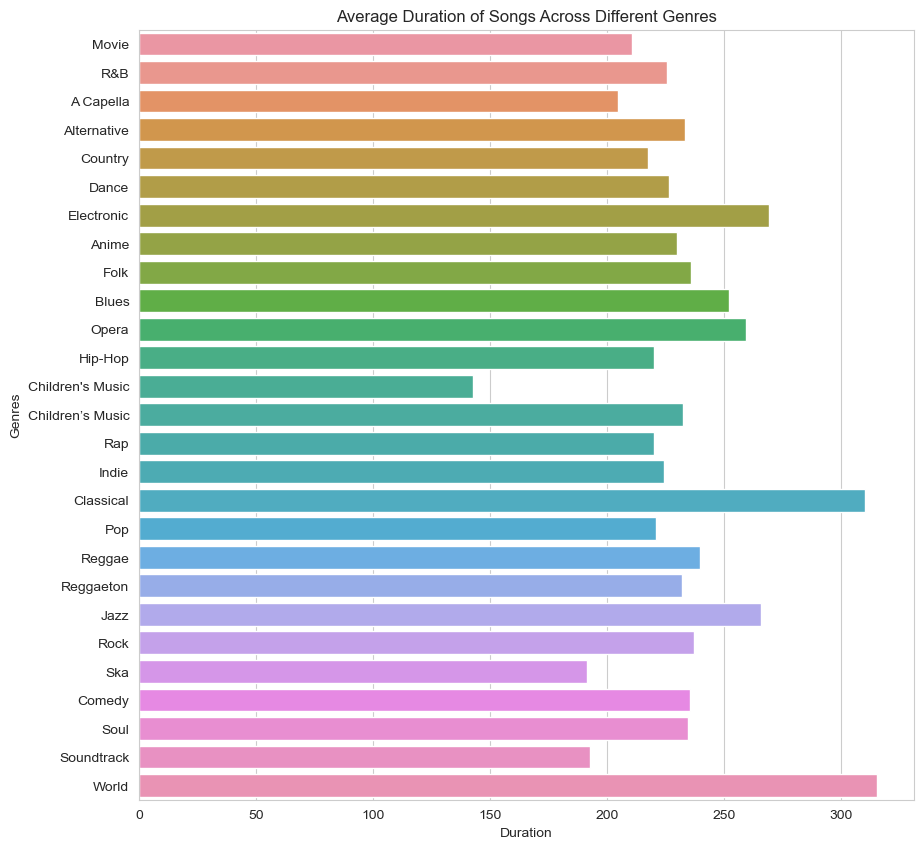

In [27]:
# Creating a bar plot to show the duration of songs within differen genres

# Creating a plot figure and assinging figure size
plt.figure(figsize =(10,10))

# Creating a bar plot using seaborn
sns.barplot(genre,x = 'duration',y = 'genre' , errorbar = None)

# Labeling the Plot
plt.title('Average Duration of Songs Across Different Genres')
plt.xlabel('Duration')
plt.ylabel('Genres')

#### Conlusion - 

The bar plot illustrates the average duration of songs across different genres. The "Movie" genre has the longest average song duration, followed by "Classical" and "Soundtrack". Genres such as "Children's Music", "Hip-Hop", and "A Capella" have shorter average durations. 

#### Top 5 Genres by Average Popularity

In [28]:
# Modifying the default data set to find average popularity of each genre using pivot table

# Generating a pivot table to group values according to genres
genre_grp = genre.pivot_table(index = 'genre', values = 'popularity', aggfunc ='mean').reset_index()

# Sorting dataset according to popularity to get top genres
genre_grp.sort_values('popularity', ascending = False, inplace = True)

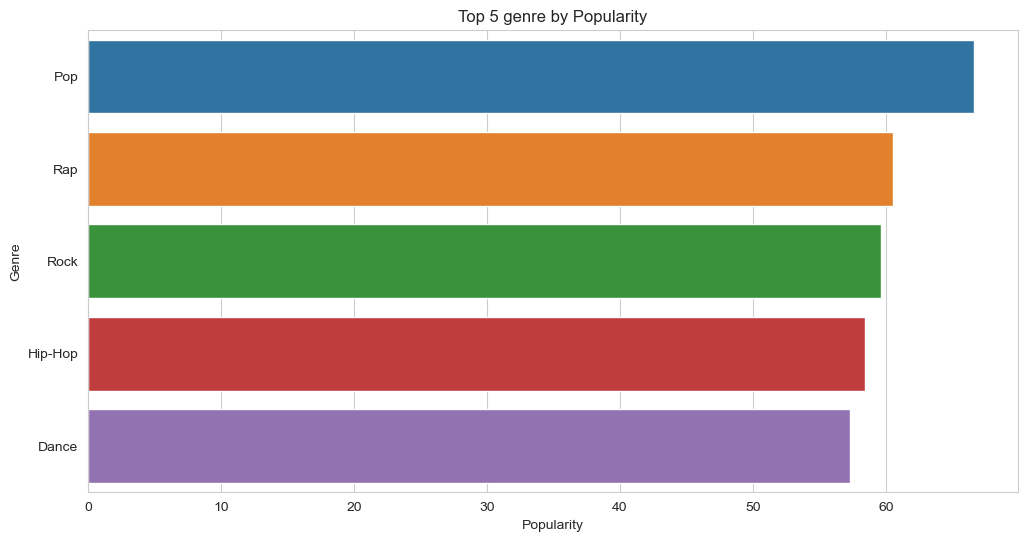

In [29]:
# Modifying figure size using pyplot
plt.figure(figsize = (12, 6))

# Using seaborn to generate a barplot
sns.barplot(genre_grp.head(5), x = 'popularity' , y = 'genre', errorbar = None)

# Labeling the Plot
plt.title('Top 5 genre by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Genre')

plt.show()

#### Conlusion - 

The bar plot displays "Pop" as the most popular genre, followed by "Rap", "Rock", "Hip-Hop", and "Dance". This indicates that these are the top 5 genres having the highest average popularity scores, suggesting they are more favored by listeners compared to other genres in the dataset.